In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [48]:
data1 = pd.read_csv('C:/Users/ADMIN/Desktop/인공지능/AI-class-main/AI-class-main/titanic.csv')

In [49]:
data1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [50]:
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [51]:
data1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [52]:
#Age 결측치를 중앙값으로 채우기
data1['Age'].fillna(data1['Age'].median(), inplace = True)
#처리하기 어려운 데이터인 Cabin값 삭제
data1.drop('Cabin', axis=1, inplace=True)
#결측치를 최빈값으로 채우기
data1['Embarked'].fillna(data1['Embarked'].mode()[0], inplace = True)

In [53]:
data1['Sex'] = data1['Sex'].map({'female':1, 'male':0})

In [54]:
data1.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [55]:
data=data1
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C


In [56]:
# Survived를 타겟 레이블로 삼아서 EDA 수행
# 1. Plass 레이블별 갯수 및 차트표시
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Text(0.5, 1.0, 'Pclass')

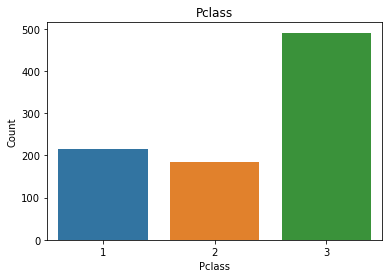

In [57]:
sns.countplot(data = data, x="Pclass")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.title("Pclass")

In [58]:
# 2. 생존자와 사망자 총 숫자 및 차트표시
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Survived')

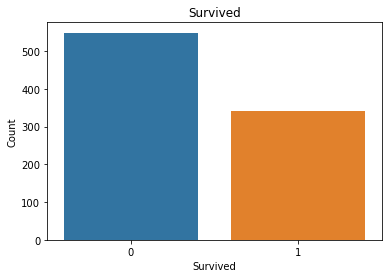

In [59]:
sns.countplot(data = data, x="Survived")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("Survived")

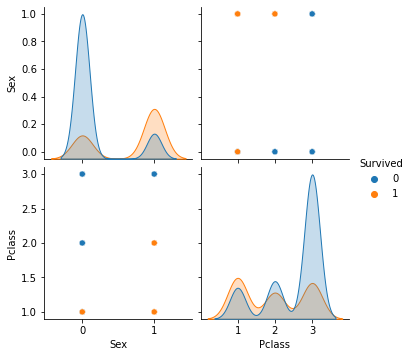

In [60]:
# 3. 성별, 티켓클래스(Pclass), 생존여부(Survived) 상관관계 분석
sns.pairplot(data,
             vars=['Sex','Pclass'],
            hue ='Survived')
plt.show()

In [67]:
#Set x and y values
Y = data.iloc[:,1].values
x_df4=data.drop(['Survived'],axis=1)
x_df3=x_df4.drop('Name',axis=1)
x_df2=x_df3.drop('Ticket',axis=1)
x_df1=x_df2.drop('PassengerId',axis=1)
x_df=x_df1.drop('Embarked',axis=1)
#normalization
x=(x_df-np.min(x_df))/(np.max(x_df)-np.min(x_df))
X = x.iloc[:,:].values
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

C:\Users\ADMIN\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\ADMIN\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [68]:
X

array([[1.        , 0.        , 0.27117366, 0.125     , 0.        ,
        0.01415106],
       [0.        , 1.        , 0.4722292 , 0.125     , 0.        ,
        0.13913574],
       [1.        , 1.        , 0.32143755, 0.        , 0.        ,
        0.01546857],
       ...,
       [1.        , 1.        , 0.34656949, 0.125     , 0.33333333,
        0.04577135],
       [0.        , 0.        , 0.32143755, 0.        , 0.        ,
        0.0585561 ],
       [1.        , 0.        , 0.39683338, 0.        , 0.        ,
        0.01512699]])

In [69]:
X.shape

(891, 6)

In [70]:
Y

array([[1, 0],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]], dtype=uint8)

In [76]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(12,input_shape=(6,),activation='ReLU'))
model.add(Dense(12,activation='ReLU'))
model.add(Dense(8,activation='ReLU'))
model.add(Dense(8,activation='ReLU'))
model.add(Dense(2,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 12)                84        
                                                                 
 dense_11 (Dense)            (None, 12)                156       
                                                                 
 dense_12 (Dense)            (None, 8)                 104       
                                                                 
 dense_13 (Dense)            (None, 8)                 72        
                                                                 
 dense_14 (Dense)            (None, 2)                 18        
                                                                 
Total params: 434
Trainable params: 434
Non-trainable params: 0
_________________________________________________________________


C:\Users\ADMIN\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [77]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
23/23 [==============================] - 0s 5ms/step - loss: 0.5364 - accuracy: 0.7556 - val_loss: 0.5244 - val_accuracy: 0.7933
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4814 - accuracy: 0.7935 - val_loss: 0.4108 - val_accuracy: 0.7933
Epoch 3/100
23/23 [==============================] - 0s 1ms/step - loss: 0.4607 - accuracy: 0.8090 - val_loss: 0.4128 - val_accuracy: 0.7933
Epoch 4/100
23/23 [==============================] - 0s 1ms/step - loss: 0.4568 - accuracy: 0.8020 - val_loss: 0.4183 - val_accuracy: 0.8101
Epoch 5/100
23/23 [==============================] - 0s 1ms/step - loss: 0.4826 - accuracy: 0.7907 - val_loss: 0.4841 - val_accuracy: 0.7654
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4485 - accuracy: 0.8132 - val_loss: 0.4051 - val_accuracy: 0.8212
Epoch 7/100
23/23 [==============================] - 0s 1ms/step - loss: 0.4466 - accuracy: 0.7907 - val_loss: 0.3730 - val_accuracy: 0.8156
Epoch 8/100
2

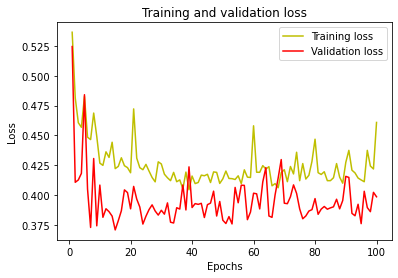

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

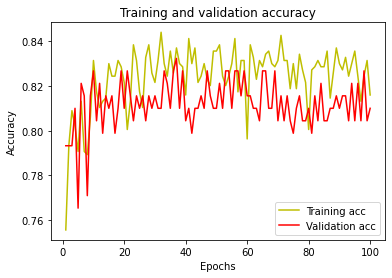

In [79]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [80]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       110
           1       0.84      0.62      0.72        69

    accuracy                           0.81       179
   macro avg       0.82      0.78      0.79       179
weighted avg       0.81      0.81      0.80       179

[[102   8]
 [ 26  43]]
